## 1.讀入需要的套件

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# For data preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

## 2. 資料前處理

In [42]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

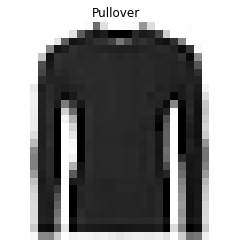

In [10]:
name_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train[idx].squeeze()
plt.imshow(x_sample,'Greys')
plt.title(name_list[y_sample])
plt.axis('off');

In [43]:
x_train.shape #檢測資料型態

(60000, 28, 28)

In [44]:
# Normalize the range of featurs
x_train = x_train.reshape(60000, 28, 28, 1)/255 #色彩範圍為0到255所以要除於255
x_test  = x_test.reshape(10000, 28, 28, 1)/255

In [45]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. 建立CNN分類模型

In [14]:
CNN_layers = [Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(112, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(224, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=112, activation='relu'),
             Dense(units=10, activation='softmax')]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
CNN_layers + FC_layers

In [16]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 112)       28336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 112)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 224)         226016    
_________________________________________________________________
global_average_pooling2d (Gl (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 112)               2

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Adam
- Loss: categorical cross-entropy 

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

In [21]:
model.layers

### 訓練模型: 透過訓練來學習分類資料的函數

In [18]:
model.fit(x_train, y_train, batch_size=112, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.8671 - categorical_accuracy: 0.6766 - val_loss: 0.6552 - val_categorical_accuracy: 0.7573
Epoch 2/3
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.5808 - categorical_accuracy: 0.7871 - val_loss: 0.5506 - val_categorical_accuracy: 0.8028
Epoch 3/3
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.4928 - categorical_accuracy: 0.8208 - val_loss: 0.4597 - val_categorical_accuracy: 0.8369


In [19]:
model.save_weights('CNN_one.h5')

### 模型預測: 預測資料集的準確率

In [20]:
model.load_weights('CNN_one.h5')

score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 5s 494us/sample - loss: 0.4597 - categorical_accuracy: 0.8369
Train Accuracy: 84.65999960899353
Test Accuracy: 83.6899995803833


## 4. Transfer Learning

In [23]:
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


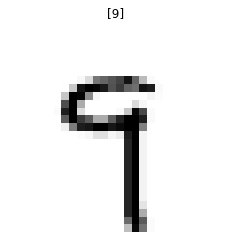

In [26]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
Y_sample = Y_train[idx].squeeze()
plt.imshow(X_sample,'Greys')
plt.title([Y_sample])
plt.axis('off');

In [27]:
X_train.shape

(60000, 28, 28)

In [29]:
# Normalize the range of featurs
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test  = X_test.reshape(10000, 28, 28, 1)/255

In [30]:
# One-hot encoding
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

CNN model for fashion_mnist
```
CNN_layers = [Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(112, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(224, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=112, activation='relu'),
             Dense(units=10, activation='softmax')]
```

CNN model for mnist
```
# From model for fashion_mnist  
CNN_layers

# New FC layers for mnist
FC_layers_number = [Dense(units=56, activation='relu'),
                   Dense(units=112, activation='relu'),
                   Dense(units=10, activation='softmax')]
```
CNN_layers 是跟人家**借**來的。

In [31]:
FC_layers_number = [Dense(units=56, activation='relu'),
                   Dense(units=112, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [32]:
model_number = Sequential(CNN_layers+FC_layers_number)
model_number.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 112)       28336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 112)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 224)         226016    
_________________________________________________________________
global_average_pooling2d (Gl (None, 224)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 56)               

### 遷移學習的訓練方式
* Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練
* Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練

In [33]:
#Frozen
for layer in CNN_layers:
    layer.trainable = False

In [34]:
model_number.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 112)       28336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 112)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 224)         226016    
_________________________________________________________________
global_average_pooling2d (Gl (None, 224)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 56)               

In [35]:
model_number.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

In [36]:
model_number.fit(X_train, Y_train, batch_size=101, epochs=8,  validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 31s 523us/sample - loss: 0.8348 - categorical_accuracy: 0.7366 - val_loss: 0.4603 - val_categorical_accuracy: 0.8490
Epoch 2/8
60000/60000 [==============================] - 31s 511us/sample - loss: 0.3795 - categorical_accuracy: 0.8809 - val_loss: 0.3131 - val_categorical_accuracy: 0.9028
Epoch 3/8
60000/60000 [==============================] - 33s 545us/sample - loss: 0.3051 - categorical_accuracy: 0.9030 - val_loss: 0.3040 - val_categorical_accuracy: 0.9032
Epoch 4/8
60000/60000 [==============================] - 33s 548us/sample - loss: 0.2522 - categorical_accuracy: 0.9200 - val_loss: 0.2418 - val_categorical_accuracy: 0.9200
Epoch 5/8
60000/60000 [==============================] - 33s 551us/sample - loss: 0.2266 - categorical_accuracy: 0.9291 - val_loss: 0.2049 - val_categorical_accuracy: 0.9335
Epoch 6/8
60000/60000 [==============================] - 33s 552us/sample - loss

### 借來的神經網路 (的權重) 會如何變化？Frozen 的場合

In [46]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 5s 462us/sample - loss: 0.4597 - categorical_accuracy: 0.8369 ETA: 1s
Train Accuracy: 84.65999960899353
Test Accuracy: 83.6899995803833


### 可以看出來和先前一樣，沒有影響
___
### 借來的神經網路 (的權重) 會如何變化？Fine-tune 的場合

In [47]:
for layer in CNN_layers:
    layer.trainable = True

In [48]:
model_number.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 112)       28336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 112)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 224)         226016    
_________________________________________________________________
global_average_pooling2d (Gl (None, 224)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 56)               

In [49]:
model_number.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])
model_number.fit(X_train, Y_train, batch_size=101, epochs=8,  validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.2005 - categorical_accuracy: 0.9416 - val_loss: 0.0986 - val_categorical_accuracy: 0.9691
Epoch 2/8
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.1095 - categorical_accuracy: 0.9661 - val_loss: 0.0887 - val_categorical_accuracy: 0.9712
Epoch 3/8
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0846 - categorical_accuracy: 0.9736 - val_loss: 0.0710 - val_categorical_accuracy: 0.9775
Epoch 4/8
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0677 - categorical_accuracy: 0.9786 - val_loss: 0.0467 - val_categorical_accuracy: 0.9851
Epoch 5/8
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0584 - categorical_accuracy: 0.9816 - val_loss: 0.0446 - val_categorical_accuracy: 0.9851
Epoch 6/8
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.05

In [50]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 6s 560us/sample - loss: 1.4968 - categorical_accuracy: 0.4224
Train Accuracy: 42.614999413490295
Test Accuracy: 42.239999771118164


### 和先前的不一樣，Fine-tune有影響，和Frozen真的不同 

___
## 5. 結論
### Transfer Learning建模真的方便不少，另外Frozen和Fine-tune的訓練時間差了五倍之多，且準確程度相差不遠。如果在新樣本數不多的情況下，採用Frozen的訓練方式，確實更為適切。